## GReaT Example with Iris Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import pandas as pd
import logging

In [3]:
from examples.utils import set_logging_level
from be_great import GReaT

/data/guoquanjiang/envs/begreat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import matplotlib.pyplot as plt

In [5]:
logger = set_logging_level(logging.INFO)
data = pd.read_csv('C:/Users/Windows 11/Desktop/Dissertation/Codes/Data/Social Sciences/predict_students_dropout_and_academic_success.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Create GReaT Model

In [6]:
# great = GReaT("/data/guoquanjiang/llm_ner/llama3-8b/LLM-Research/Meta-Llama-3-8B",                  # Name of the large language model used (see HuggingFace for more options)
#               epochs=10,                   # Number of epochs to train
#               save_steps=2000,               # Save model weights every x steps
#               logging_steps=500,             # Log the loss and learning rate every x steps
#               experiment_dir="trainer_travel", # Name of the directory where all intermediate steps are saved
#               batch_size=16,                 # Batch Size
#               #lr_scheduler_type="constant", # Specify the learning rate scheduler 
#               #learning_rate=5e-5            # Set the inital learning rate
#               efficient_finetuning="lora"
#              )
great = GReaT("C:/Users/Windows 11/Desktop/Dissertation/Codes/models/iiBcai/gpt2",                  # Name of the large language model used (see HuggingFace for more options)
              epochs=10,                   # Number of epochs to train
              save_steps=2000,               # Save model weights every x steps
              logging_steps=100,             # Log the loss and learning rate every x steps
              experiment_dir="trainer_students_drop", # Name of the directory where all intermediate steps are saved
              batch_size=32                # Batch Size
              #lr_scheduler_type="constant", # Specify the learning rate scheduler 
              #learning_rate=5e-5            # Set the inital learning rate
            #   efficient_finetuning="lora"
             )

### Start Training

In [8]:
trainer = great.fit(data)

2024-06-28 22:09:43,139 - INFO - Convert data into HuggingFace dataset object... (great.py:172)
2024-06-28 22:09:43,169 - INFO - Create GReaT Trainer... (great.py:177)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
2024-06-28 22:09:43,293 - INFO - Start training... (great.py:193)


Step,Training Loss
100,0.760900
200,0.584800
300,0.554600
400,0.540300
500,0.529600
600,0.521900
700,0.512700
800,0.503100
900,0.497000
1000,0.493300


In [9]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 3018.9518,
 'train_samples_per_second': 14.654,
 'train_steps_per_second': 0.46,
 'total_flos': 7189736048640000.0,
 'train_loss': 0.532597062913634,
 'epoch': 10.0,
 'step': 1390}

In [10]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

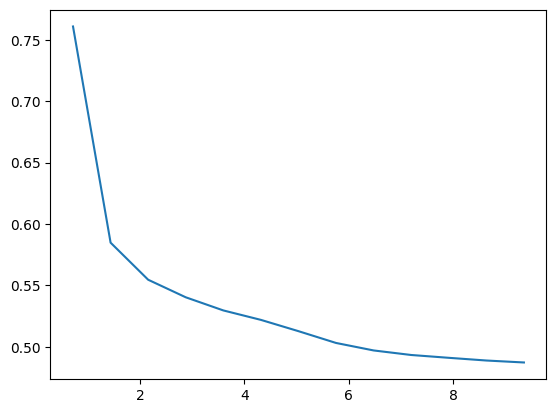

In [11]:
plt.plot(epochs, loss)

### Generate Samples

In [12]:
n_samples = 1000

In [13]:
samples = great.sample(n_samples, k=50, max_length=500)

  0%|          | 0/1000 [00:00<?, ?it/s]

['Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,',

  2%|▏         | 19/1000 [00:09<07:49,  2.09it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Ta

  3%|▎         | 31/1000 [00:17<09:44,  1.66it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,',

  5%|▌         | 52/1000 [00:26<07:58,  1.98it/s]

['Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Ta

  7%|▋         | 68/1000 [00:35<08:08,  1.91it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'T

  9%|▉         | 90/1000 [00:44<07:11,  2.11it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', '

 11%|█▏        | 113/1000 [00:53<06:31,  2.27it/s]

['Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,

 13%|█▎        | 132/1000 [01:02<06:32,  2.21it/s]

['Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,',

 15%|█▌        | 154/1000 [01:11<06:09,  2.29it/s]

['Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 

 18%|█▊        | 177/1000 [01:20<05:45,  2.38it/s]

['Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,',

 20%|█▉        | 197/1000 [01:29<05:46,  2.32it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,',

 21%|██        | 211/1000 [01:38<06:18,  2.09it/s]

['Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout

 23%|██▎       | 230/1000 [01:47<06:07,  2.09it/s]

['Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,

 25%|██▍       | 247/1000 [01:56<06:10,  2.03it/s]

['Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 

 26%|██▌       | 262/1000 [02:05<06:23,  1.93it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target

 28%|██▊       | 281/1000 [02:14<06:02,  1.99it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,'

 30%|██▉       | 296/1000 [02:23<06:13,  1.89it/s]

['Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,',

 32%|███▏      | 318/1000 [02:32<05:31,  2.06it/s]

['Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Targe

 34%|███▍      | 345/1000 [02:41<04:39,  2.35it/s]

['Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', '

 37%|███▋      | 367/1000 [02:50<04:26,  2.37it/s]

['Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', '

 39%|███▉      | 388/1000 [02:59<04:18,  2.36it/s]

['Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,',

 41%|████      | 411/1000 [03:08<04:03,  2.42it/s]

['Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', '

 43%|████▎     | 427/1000 [03:17<04:20,  2.20it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'T

 45%|████▍     | 449/1000 [03:26<04:01,  2.28it/s]

['Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', '

 47%|████▋     | 472/1000 [03:35<03:43,  2.36it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Targ

 48%|████▊     | 484/1000 [03:44<04:10,  2.06it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,'

 51%|█████     | 511/1000 [03:53<03:29,  2.33it/s]

['Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 

 53%|█████▎    | 534/1000 [04:02<03:14,  2.39it/s]

['Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Tar

 55%|█████▌    | 554/1000 [04:11<03:09,  2.35it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', '

 57%|█████▋    | 571/1000 [04:20<03:13,  2.21it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropo

 59%|█████▉    | 591/1000 [04:29<03:05,  2.21it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,'

 61%|██████▏   | 613/1000 [04:38<02:49,  2.28it/s]

['Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Ta

 64%|██████▎   | 635/1000 [04:47<02:35,  2.35it/s]

['Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', '

 66%|██████▌   | 655/1000 [04:56<02:29,  2.31it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', '

 68%|██████▊   | 675/1000 [05:05<02:22,  2.28it/s]

['Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'T

 70%|██████▉   | 695/1000 [05:14<02:14,  2.26it/s]

['Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', '

 71%|███████   | 710/1000 [05:23<02:19,  2.09it/s]

['Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', '

 73%|███████▎  | 727/1000 [05:32<02:13,  2.04it/s]

['Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Tar

 75%|███████▍  | 749/1000 [05:41<01:56,  2.15it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target i

 76%|███████▌  | 762/1000 [05:50<02:03,  1.93it/s]

['Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'T

 78%|███████▊  | 780/1000 [05:59<01:52,  1.95it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 

 80%|███████▉  | 798/1000 [06:08<01:42,  1.97it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,

 81%|████████  | 812/1000 [06:17<01:41,  1.85it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Targ

 84%|████████▎ | 837/1000 [06:26<01:16,  2.12it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout

 86%|████████▌ | 862/1000 [06:35<00:59,  2.30it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,

 89%|████████▊ | 886/1000 [06:45<00:47,  2.39it/s]

['Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,'

 90%|█████████ | 902/1000 [06:54<00:44,  2.22it/s]

['Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 

 92%|█████████▏| 923/1000 [07:03<00:34,  2.25it/s]

['Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,'

 94%|█████████▍| 944/1000 [07:11<00:24,  2.30it/s]

['Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,',

 97%|█████████▋| 967/1000 [07:20<00:13,  2.37it/s]

['Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,',

 98%|█████████▊| 985/1000 [07:29<00:06,  2.26it/s]

['Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Graduate,', 'Target is Enrolled,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Dropout,', 'Target is Enrolled,', 'Target is Graduate,'

1004it [07:37,  2.19it/s]                         


In [14]:
samples.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,1.0,2.0,8014.0,1.0,1.0,131.0,1.0,37.0,38.0,...,0.0,6.0,13.0,5.0,11.833333,0.0,11.1,1.4,2.02,Graduate
1,1.0,1.0,3.0,9853.0,1.0,1.0,133.1,1.0,1.0,19.0,...,0.0,6.0,7.0,5.0,13.600000,0.0,16.2,0.6,1.79,Graduate
2,1.0,17.0,1.0,171.0,1.0,1.0,133.1,1.0,37.0,37.0,...,0.0,5.0,7.0,5.0,10.500000,0.0,13.9,-0.3,0.79,Graduate
3,1.0,1.0,2.0,9991.0,1.0,1.0,141.0,1.0,38.0,19.0,...,0.0,5.0,5.0,0.0,0.000000,0.0,10.8,0.5,1.74,Dropout
4,1.0,1.0,1.0,9556.0,1.0,1.0,128.0,1.0,1.0,19.0,...,0.0,6.0,0.0,0.0,0.000000,0.0,11.1,0.6,2.02,Dropout


In [15]:
samples.to_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/Social Science/student_dropout_samples.csv",index=False)

## Plot Data

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
670,30,No,Low Income,1,No,Yes,0
211,29,No,Low Income,2,No,No,0
821,37,Yes,High Income,1,No,No,0
410,30,No,Middle Income,3,No,Yes,0
255,37,No,Middle Income,6,No,Yes,0


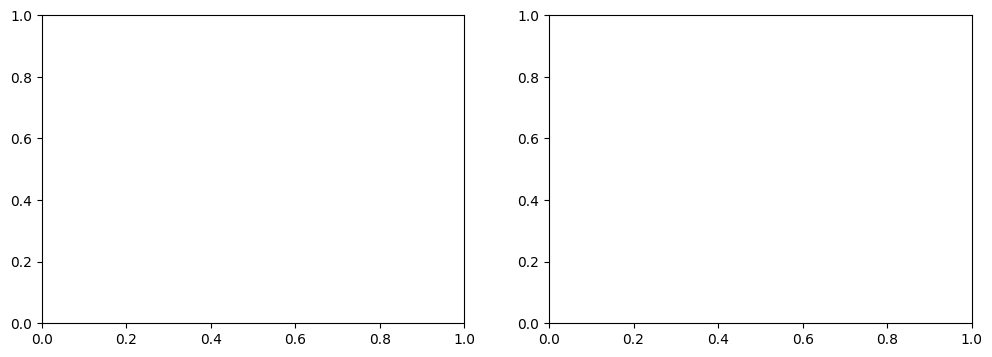

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 100)
true_samples.head()

Original Data

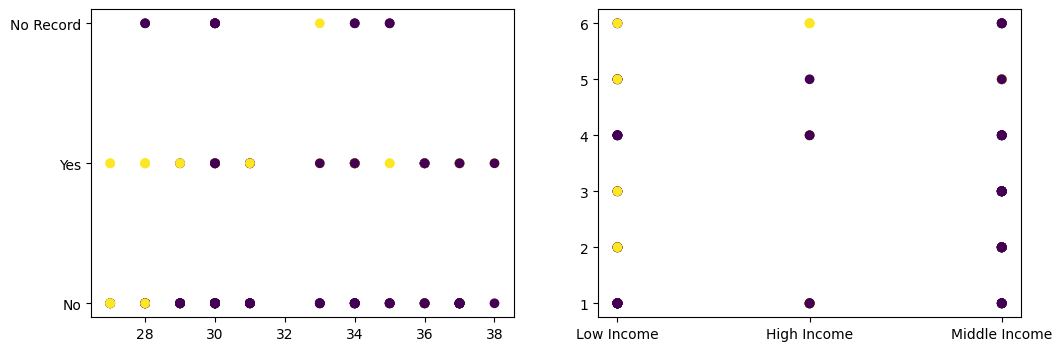

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
true_samples = data.sample(n = 200)
ax[0].scatter(true_samples["Age"], true_samples["FrequentFlyer"], c=true_samples["Target"])
ax[1].scatter(true_samples["AnnualIncomeClass"], true_samples["ServicesOpted"], c=true_samples["Target"])

Generated samples

In [28]:
samples = pd.read_csv("C:/Users/Windows 11/Desktop/Dissertation/Codes/sample_data/travel_samples.csv")

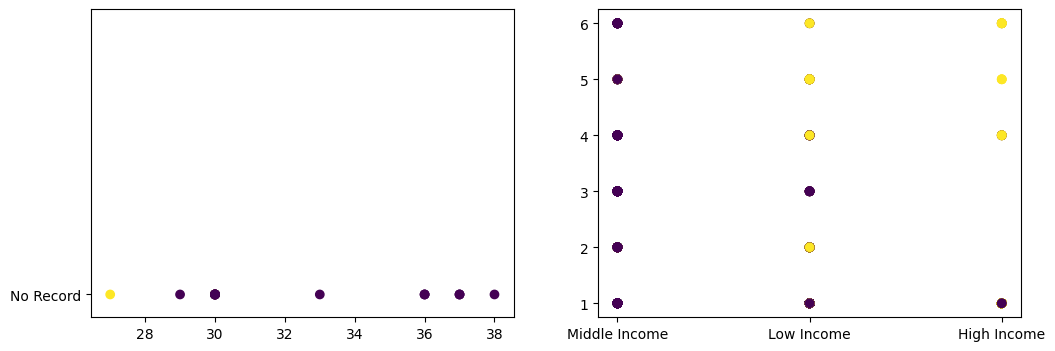

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].scatter(samples["Age"], samples["FrequentFlyer"], c=samples["Target"])
ax[0].set_ylim(1.8, 4.5)
ax[1].scatter(samples["AnnualIncomeClass"], samples["ServicesOpted"], c=samples["Target"].astype("int"))
